In [7]:
# notebooks/day1_eda.ipynb

import sys
import os
sys.path.append(os.path.abspath("../src"))

import summarization

# Load data
df = summarization.load_data("../data/raw/MachineLearningRating_v3.txt")

# Select numeric columns
numeric_cols = ["TotalPremium", "TotalClaims", "CalculatedPremiumPerTerm", "SumInsured"]

# 1. Descriptive stats
print("Descriptive Statistics:\n")
print(summarization.get_descriptive_stats(df, numeric_cols))

# 2. Variability (standard deviation)
print("\nVariability (Standard Deviation):\n")
print(summarization.get_variability(df, numeric_cols))

# 3. Data types
print("\nData Types:\n")
print(summarization.check_data_types(df))

# 4. Missing values
print("\nMissing Values:\n")
print(summarization.summarize_missing_values(df))


c:\Users\soswo\OneDrive\Desktop\projects\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\src\summarization.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter='|')


Descriptive Statistics:

                              count           mean           std  \
TotalPremium              1000098.0      61.905496  2.302845e+02   
TotalClaims               1000098.0      64.861190  2.384075e+03   
CalculatedPremiumPerTerm  1000098.0     117.875691  3.997017e+02   
SumInsured                1000098.0  604172.732589  1.508332e+06   

                                   min        25%          50%            75%  \
TotalPremium               -782.576754     0.0000     2.178333      21.929825   
TotalClaims              -12002.412281     0.0000     0.000000       0.000000   
CalculatedPremiumPerTerm      0.000000     3.2248     8.436900      90.000000   
SumInsured                    0.010000  5000.0000  7500.000000  250000.000000   

                                   max  
TotalPremium              6.528260e+04  
TotalClaims               3.930921e+05  
CalculatedPremiumPerTerm  7.442217e+04  
SumInsured                1.263620e+07  

Variability (Standard 

In [8]:
# Check missing values
missing_report = summarization.summarize_missing_values(df)

if not missing_report.empty:
    print("🔍 Columns with Missing Values:\n")
    print(missing_report)
else:
    print("✅ No missing values found.")


🔍 Columns with Missing Values:

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        

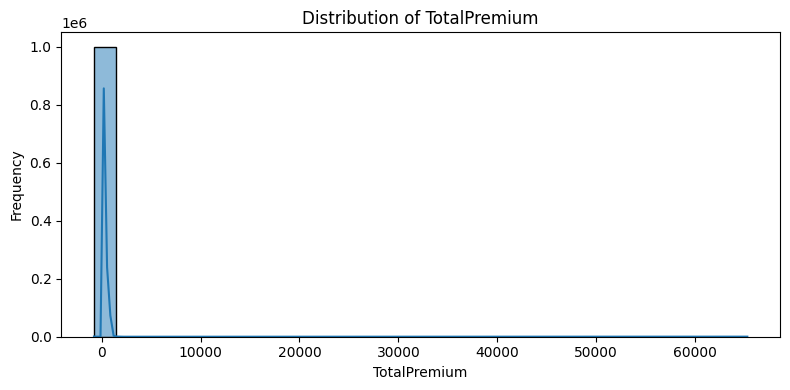

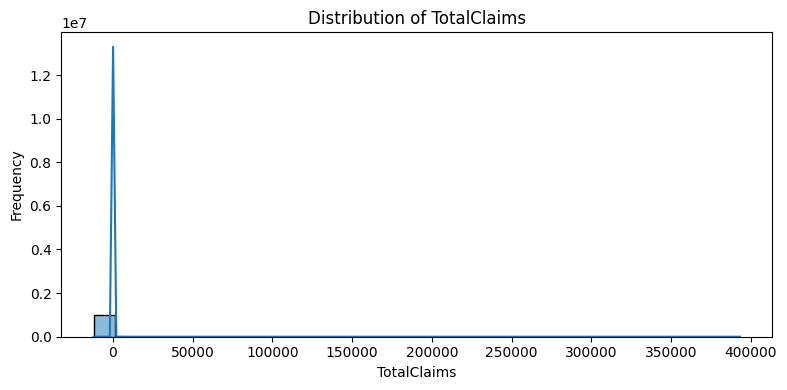

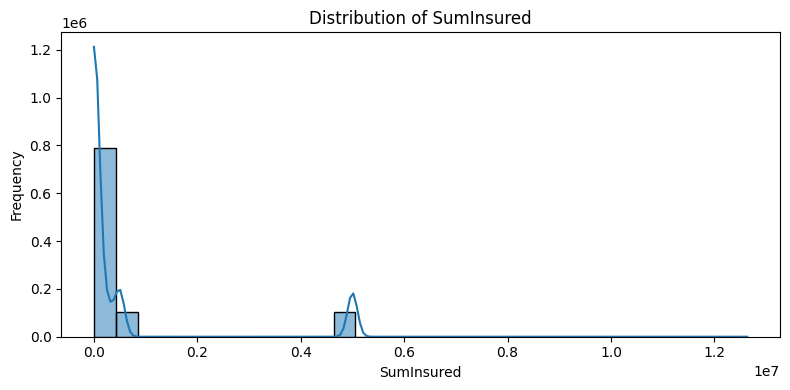

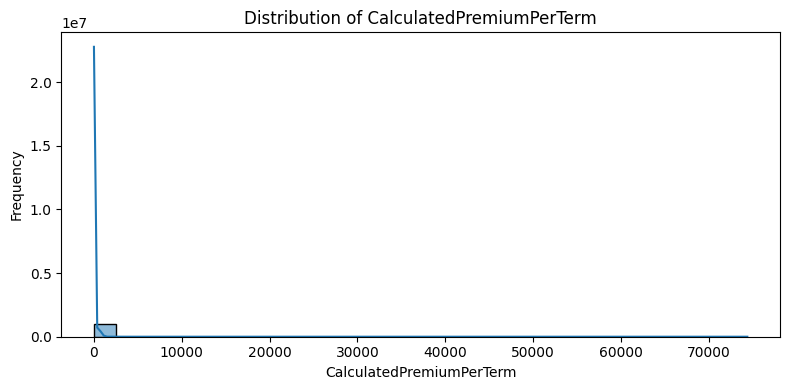

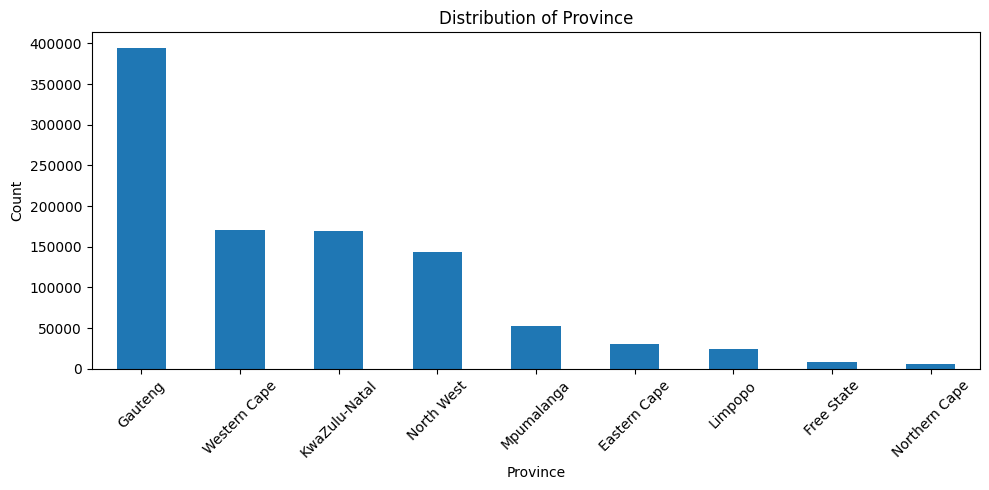

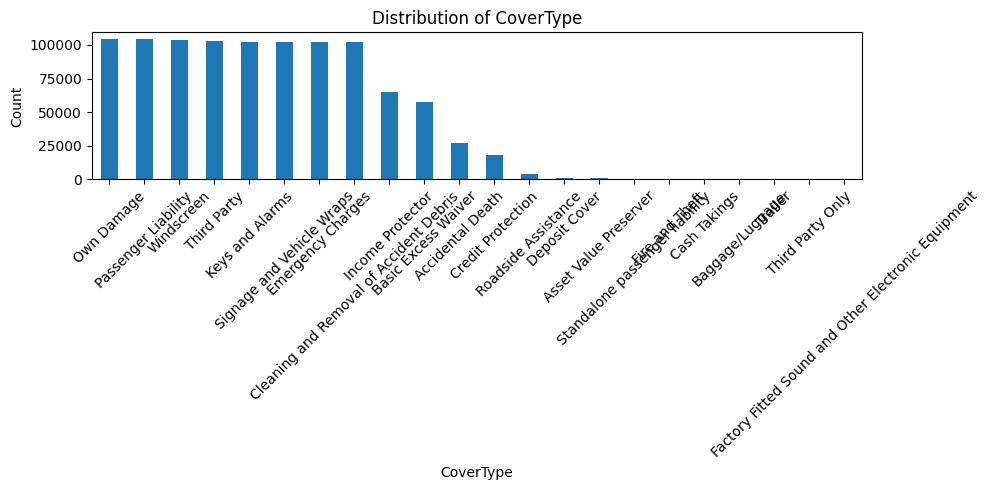

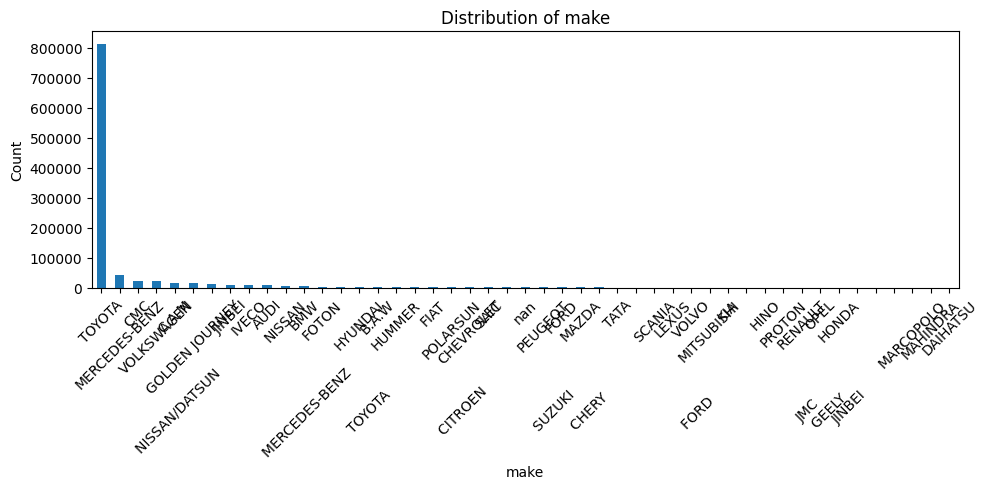

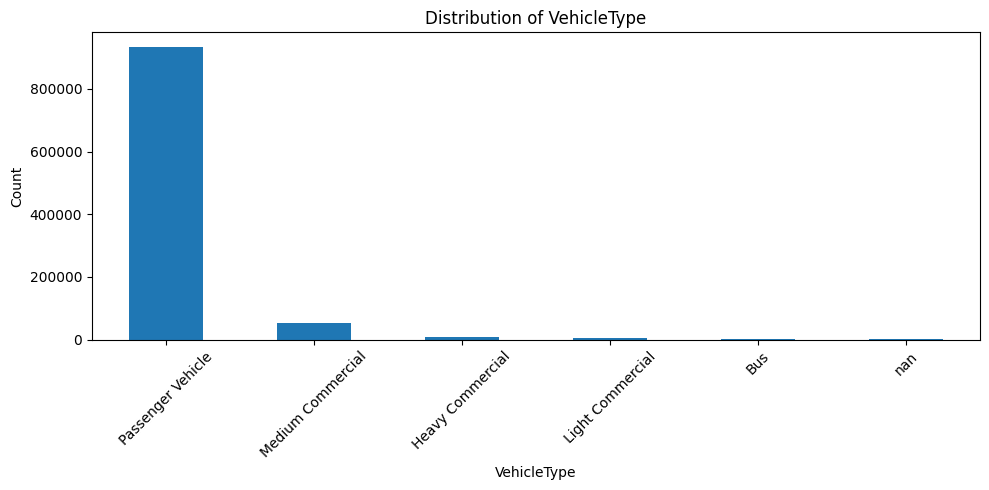

In [9]:
from src import visualization

# Numerical columns to analyze
numeric_cols = ["TotalPremium", "TotalClaims", "SumInsured", "CalculatedPremiumPerTerm"]

# Categorical columns to analyze
categorical_cols = ["Province", "CoverType", "make", "VehicleType"]

# Univariate plots
visualization.plot_numeric_distributions(df, numeric_cols, save_dir="../outputs/figures")
visualization.plot_categorical_distributions(df, categorical_cols, save_dir="../outputs/figures")


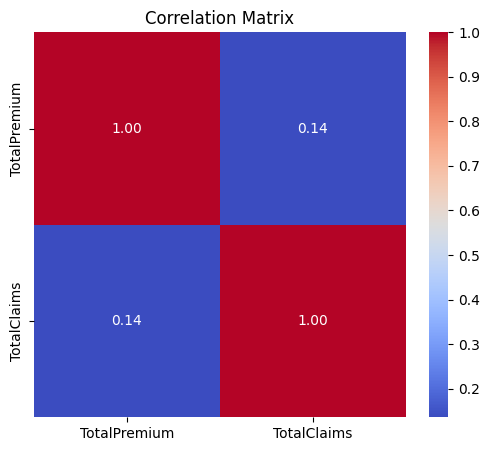

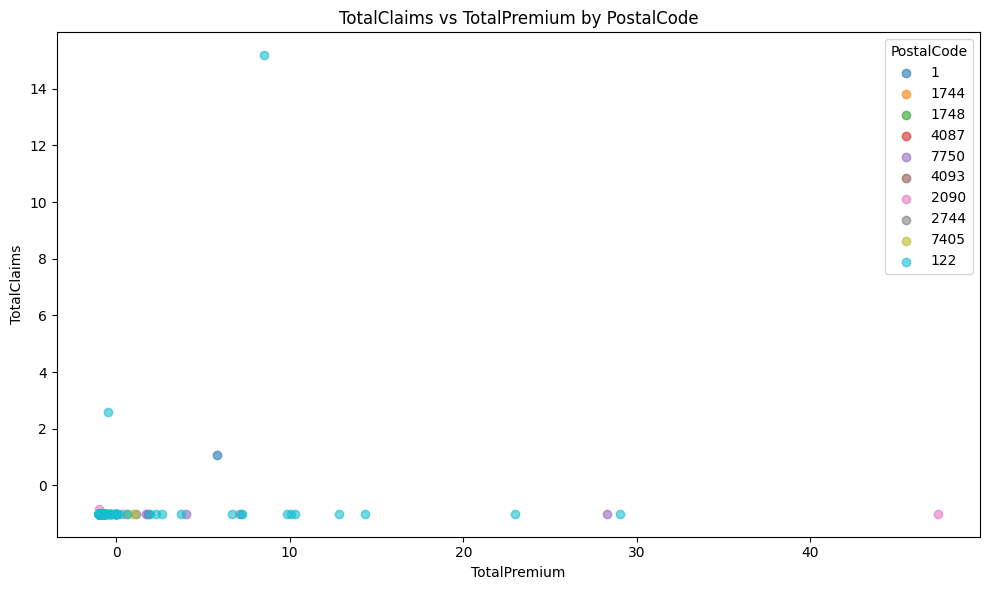

In [10]:
from src import analysis

# Columns to calculate monthly % changes for
value_cols = ["TotalPremium", "TotalClaims"]

# Calculate monthly changes grouped by PostalCode
monthly_changes = analysis.calculate_monthly_changes(df, group_col="PostalCode", value_cols=value_cols)

# Plot correlation matrix for monthly changes (drop NaNs first)
analysis.plot_correlation_matrix(monthly_changes.dropna(), value_cols, save_dir="../outputs/figures")

# Scatter plot by PostalCode for monthly changes
analysis.scatter_by_group(monthly_changes.dropna(), x_col="TotalPremium", y_col="TotalClaims", group_col="PostalCode", save_dir="../outputs/figures")


c:\Users\soswo\OneDrive\Desktop\projects\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\src\data_comparison.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_premium, x=region_col, y=premium_col, palette="viridis")


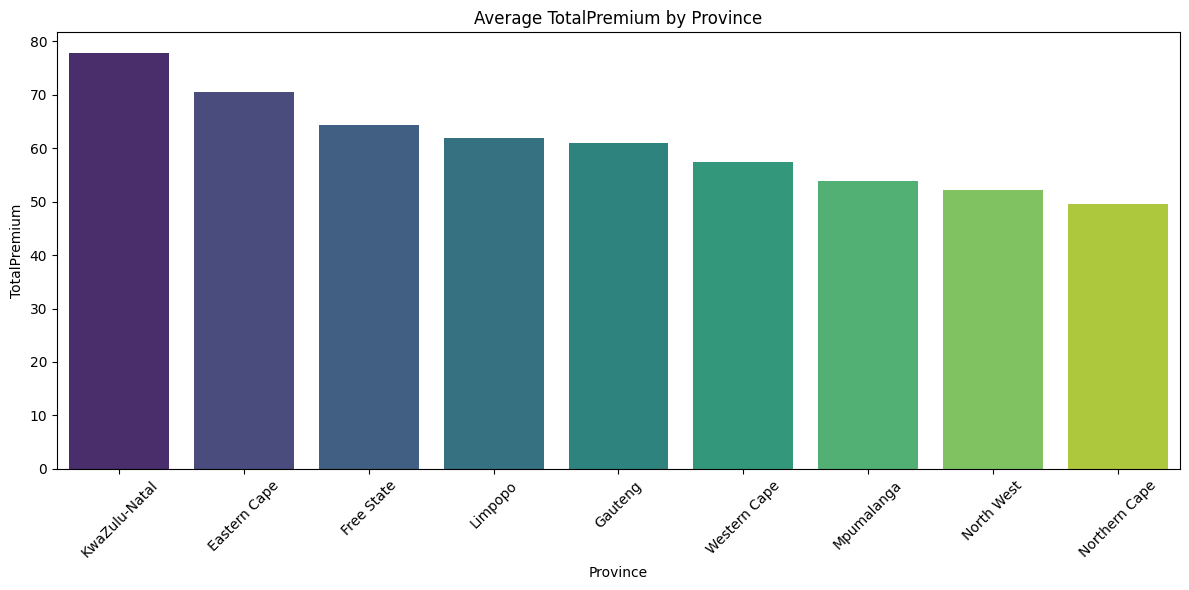

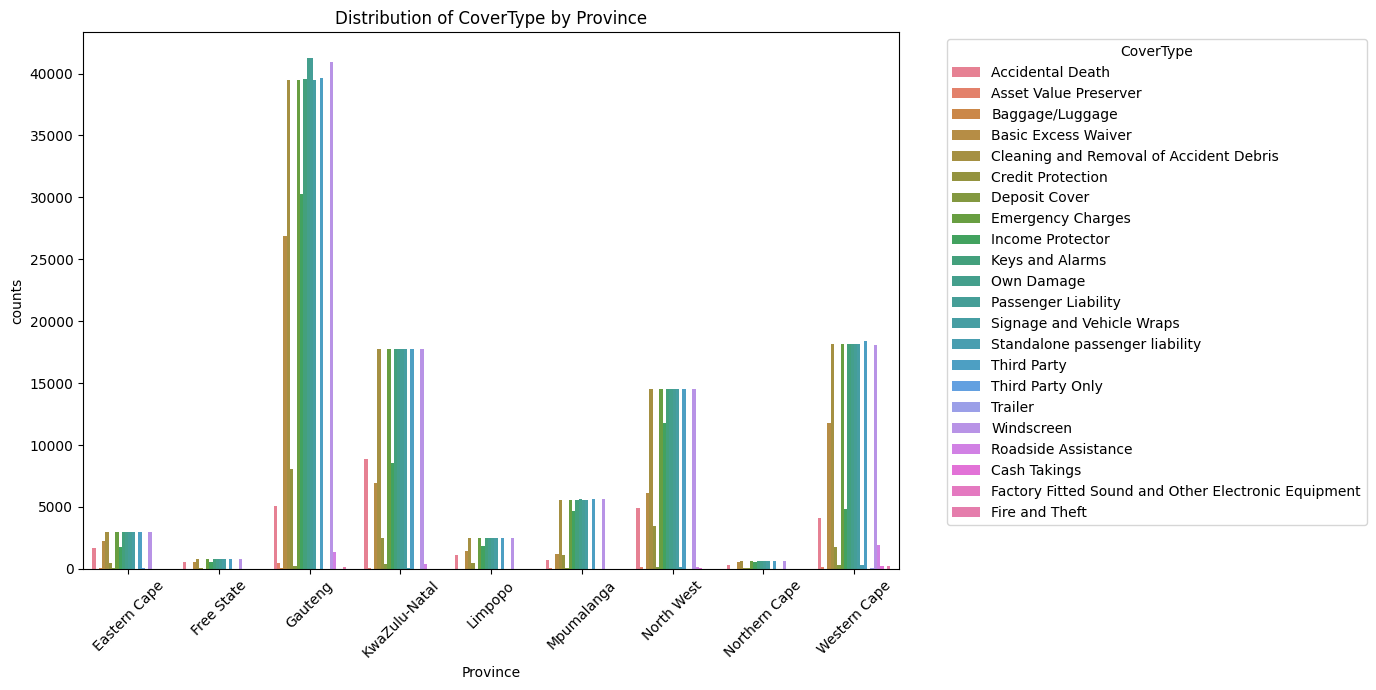

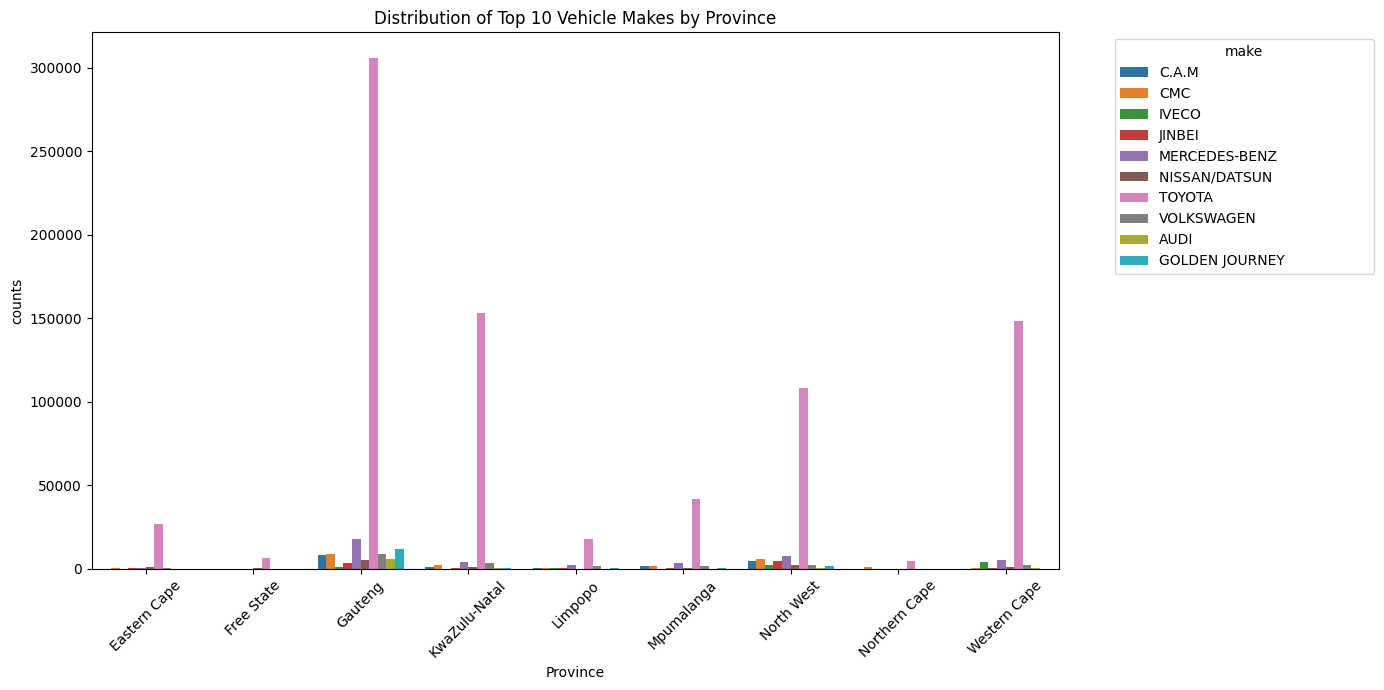

In [11]:
from src import data_comparison

data_comparison.plot_avg_premium_by_region(df, region_col="Province", premium_col="TotalPremium", save_dir="../outputs/figures")
data_comparison.plot_cover_type_distribution(df, region_col="Province", cover_col="CoverType", save_dir="../outputs/figures")
data_comparison.plot_make_distribution_by_region(df, region_col="Province", make_col="make", top_n=10, save_dir="../outputs/figures")


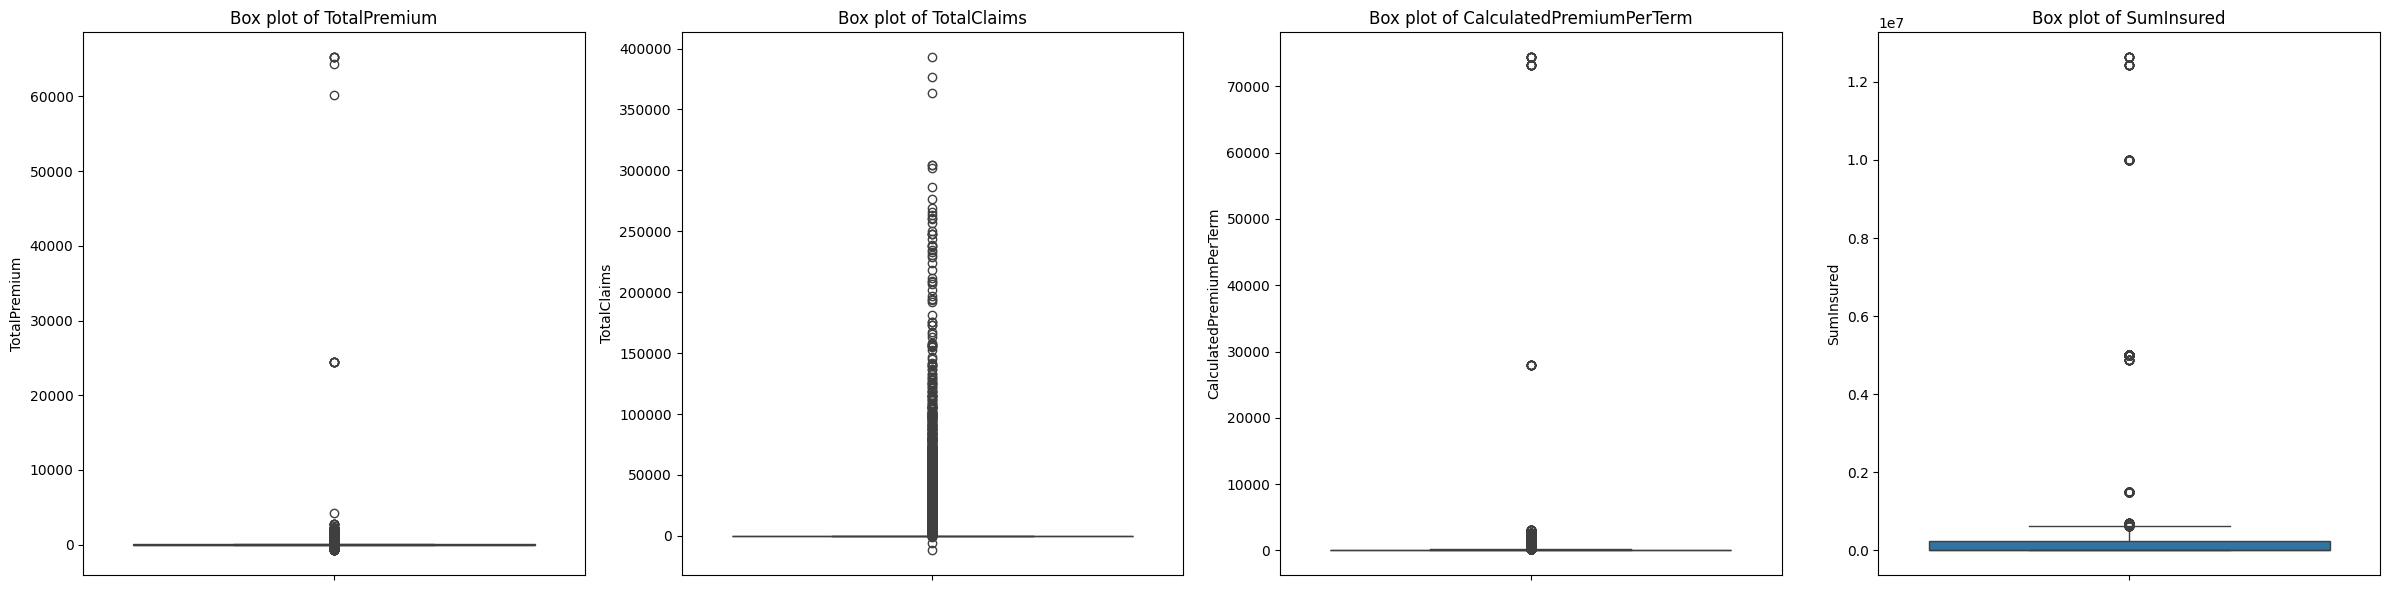

In [12]:
from src import outlier_detection

numeric_cols = ["TotalPremium", "TotalClaims", "CalculatedPremiumPerTerm", "SumInsured"]
outlier_detection.plot_boxplots_for_outliers(df, numeric_cols, save_dir="../outputs/figures")


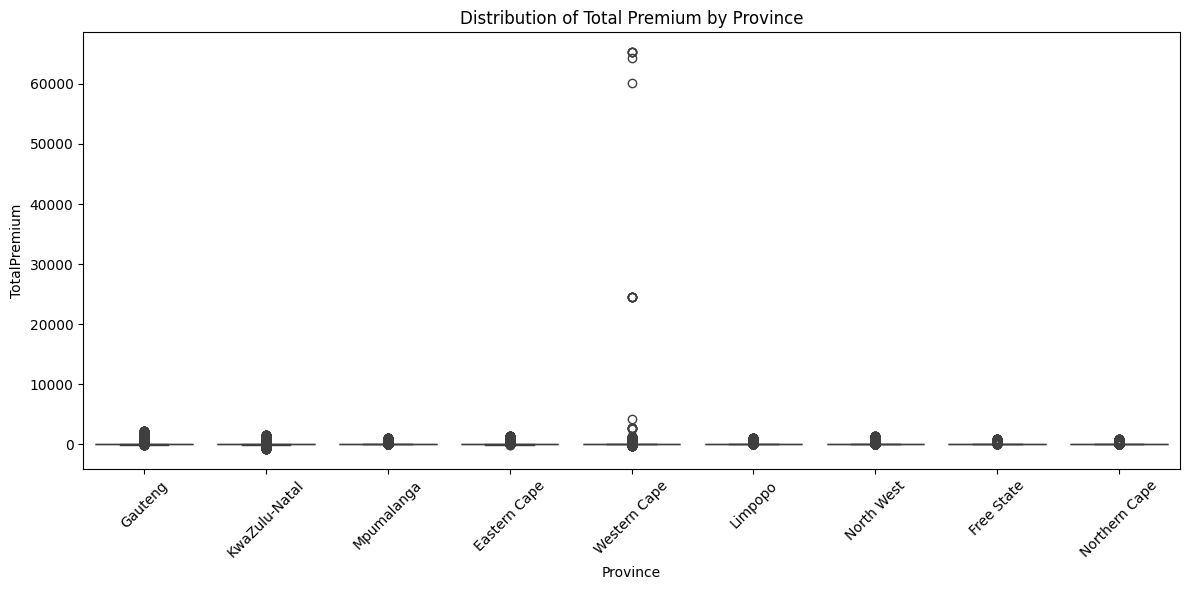

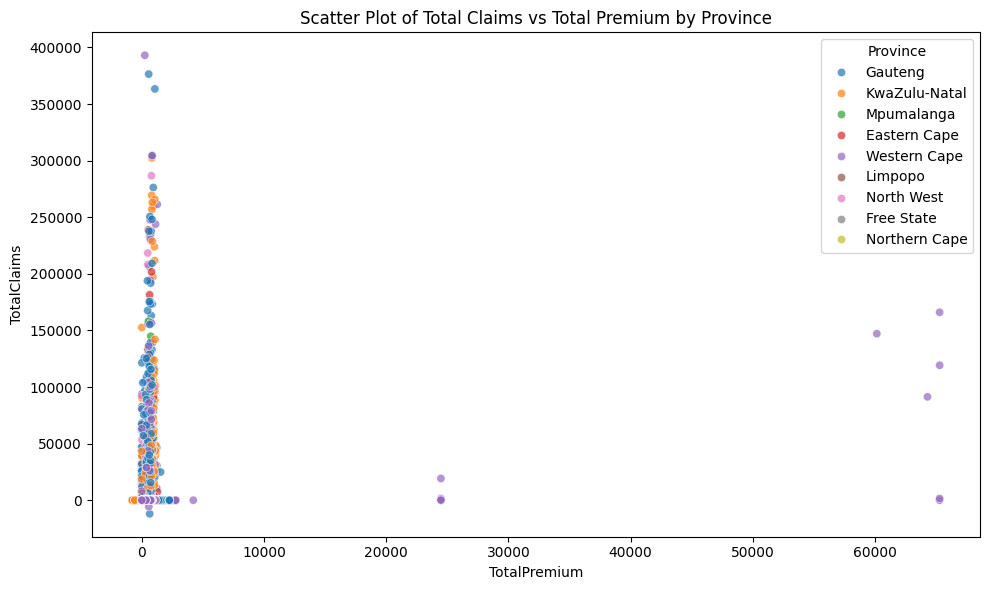

c:\Users\soswo\OneDrive\Desktop\projects\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\src\visualization2.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")


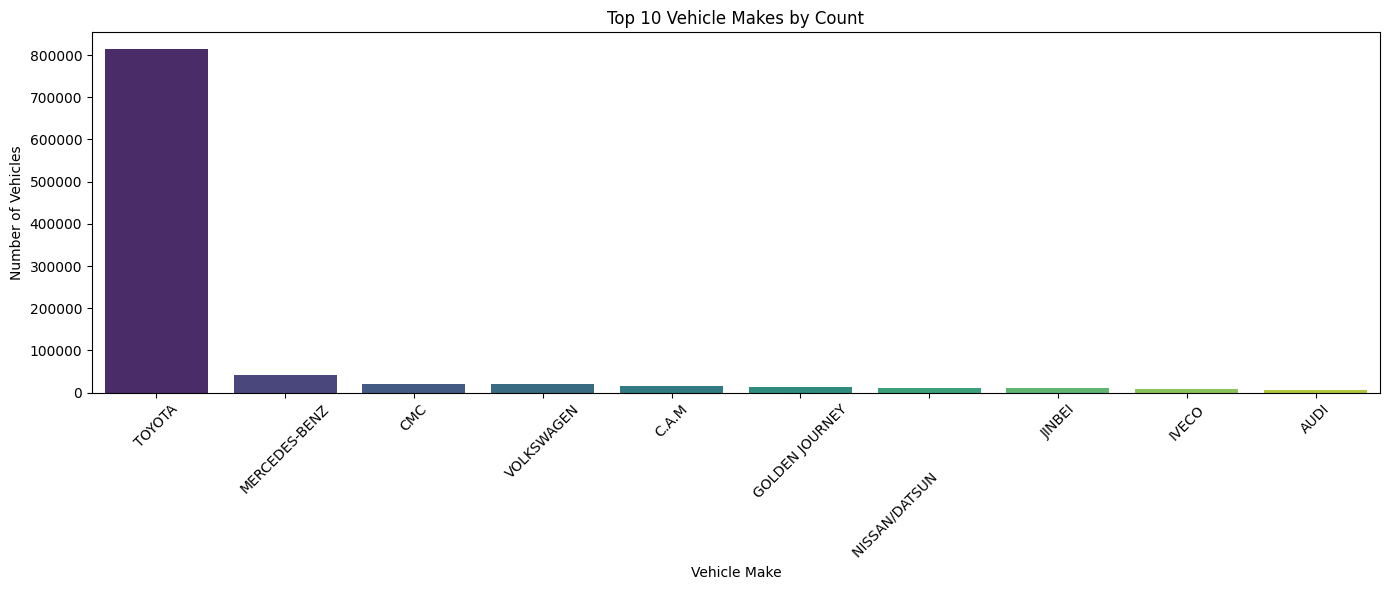

In [13]:
from src import visualization2

visualization2.plot_premium_distribution_by_province(df, save_dir="../outputs/figures")
visualization2.plot_claims_vs_premium_scatter(df, save_dir="../outputs/figures")
visualization2.plot_vehicle_make_counts(df, save_dir="../outputs/figures")
